In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus



In [3]:
# The dataset contains predictions attrition of 1469 employees (rows) with 35 columns, made 7 years ago by IBM data scientists. 
# Variables that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ 
# or ‘compare average monthly income by education and attrition’.

In [4]:
dataset = pd.read_csv('D:/MASTER/Anul II/python lab/proiect lab/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# 1. Initial analysis of the data.
# column descriptions 
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# data types
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# number of null/na values
# dataset.isnull()
# dataset.isna()
nan_count = dataset.isna().sum()
print(nan_count)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
dataset.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [9]:
# 1.2 Numerical / Statistical analysis of the columns
# Extract  only numerical columns

numerical_data = dataset.select_dtypes(include=['int64'])
numerical_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [10]:
# Statistical Analysis for each numerical column
def analysisOfNumericColumns(df):
    for column in df:
        print(f"Statistics for {column}:")
        print("Mean:", df[column].mean())
        print("Median:", df[column].median())
        print("Mode:", df[column].mode()[0])
        print("Standard Deviation:", df[column].std())
        print("Minimum:", df[column].min())
        print("Maximum:", df[column].max())
        print("25th Percentile:", df[column].quantile(0.25))
        print("75th Percentile:", df[column].quantile(0.75))
        print("Number of Null Values:", df[column].isnull().sum())
        print("\n")
        
analysisOfNumericColumns(numerical_data)

Statistics for Age:
Mean: 36.923809523809524
Median: 36.0
Mode: 35
Standard Deviation: 9.135373489136732
Minimum: 18
Maximum: 60
25th Percentile: 30.0
75th Percentile: 43.0
Number of Null Values: 0


Statistics for DailyRate:
Mean: 802.4857142857143
Median: 802.0
Mode: 691
Standard Deviation: 403.50909994352816
Minimum: 102
Maximum: 1499
25th Percentile: 465.0
75th Percentile: 1157.0
Number of Null Values: 0


Statistics for DistanceFromHome:
Mean: 9.19251700680272
Median: 7.0
Mode: 2
Standard Deviation: 8.106864435666074
Minimum: 1
Maximum: 29
25th Percentile: 2.0
75th Percentile: 14.0
Number of Null Values: 0


Statistics for Education:
Mean: 2.912925170068027
Median: 3.0
Mode: 3
Standard Deviation: 1.0241649445978729
Minimum: 1
Maximum: 5
25th Percentile: 2.0
75th Percentile: 4.0
Number of Null Values: 0


Statistics for EmployeeCount:
Mean: 1.0
Median: 1.0
Mode: 1
Standard Deviation: 0.0
Minimum: 1
Maximum: 1
25th Percentile: 1.0
75th Percentile: 1.0
Number of Null Values: 0


Stat

In [11]:
# 2. Some interesting grouping/filtering of the data that will put in evidence some features.
# - At least 5 queries involving aggregating two or more columns

# 2.1 For every department, calculate sum & mean of TotalWorkingYears and YearsAtCompany, also mean of age
sumAndMean = dataset.groupby('Department').agg({'TotalWorkingYears': ['sum', 'mean'], 'YearsAtCompany': ['sum', 'mean'], 'Age':['mean']})
print(sumAndMean)

                       TotalWorkingYears            YearsAtCompany            \
                                     sum       mean            sum      mean   
Department                                                                     
Human Resources                      728  11.555556            456  7.238095   
Research & Development             10900  11.342352           6597  6.864724   
Sales                               4953  11.105381           3249  7.284753   

                              Age  
                             mean  
Department                         
Human Resources         37.809524  
Research & Development  37.042664  
Sales                   36.542601  


In [12]:
# 2.2 For every EducationField, calculate the maximum number of DistanceFromHome & YearsAtCompany and the minimum of StandardHours

maxAndMin = dataset.groupby('EducationField').apply(lambda x: pd.Series({
    'max_DistanceFromHome': x['DistanceFromHome'].max(),
    'max_YearsAtCompany': x['YearsAtCompany'].max(),
    'min_StandardHours': x['StandardHours'].min()
}))
print(maxAndMin)

                  max_DistanceFromHome  max_YearsAtCompany  min_StandardHours
EducationField                                                               
Human Resources                     26                  22                 80
Life Sciences                       29                  33                 80
Marketing                           29                  36                 80
Medical                             29                  40                 80
Other                               29                  26                 80
Technical Degree                    29                  33                 80


In [13]:
# 2.3 Calculate the maximum number of employees that works in every EducationField
numberOfEmployeePerCategory = dataset.groupby('EducationField').agg({'YearsAtCompany': ['max']})
print(numberOfEmployeePerCategory)

                 YearsAtCompany
                            max
EducationField                 
Human Resources              22
Life Sciences                33
Marketing                    36
Medical                      40
Other                        26
Technical Degree             33


In [14]:
# 2.4 For every EducationField, calculate the total number of TrainingTimesLastYear, and find minimum number of YearsSinceLastPromotion and the maximum nr of YearsAtCompany
inventoryPromotion = dataset.groupby('EducationField').agg({'TrainingTimesLastYear': ['count'], 'YearsSinceLastPromotion': ['min'], 'YearsAtCompany': ['max']})
print(inventoryPromotion)

                 TrainingTimesLastYear YearsSinceLastPromotion YearsAtCompany
                                 count                     min            max
EducationField                                                               
Human Resources                     27                       0             22
Life Sciences                      606                       0             33
Marketing                          159                       0             36
Medical                            464                       0             40
Other                               82                       0             26
Technical Degree                   132                       0             33


In [15]:
# 2.5 Count the number of female/male per JobRole
result = dataset.groupby('JobRole')['Gender'].aggregate('count')
print(result)

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: Gender, dtype: int64


In [16]:
# 2.6 Average of YearsAtCompany with the maximum job satisfaction for every female/male 
satisfactionAtWorkPerGender = dataset.groupby('Gender').agg({'YearsAtCompany': ['mean'], 'JobSatisfaction':['max']})
print(satisfactionAtWorkPerGender)

       YearsAtCompany JobSatisfaction
                 mean             max
Gender                               
Female       7.231293               4
Male         6.859410               4


In [17]:
lasterJobRole = dataset.groupby('JobRole')['EmployeeNumber'].last()
print(lasterJobRole)

JobRole
Healthcare Representative    2062
Human Resources              2040
Laboratory Technician        2068
Manager                      2031
Manufacturing Director       2064
Research Director            2017
Research Scientist           2054
Sales Executive              2065
Sales Representative         2060
Name: EmployeeNumber, dtype: int64


In [18]:
# - At least 5 queries that will filter data based on different column values.

# 2.1 Filter by Job Role and Calculate Average Monthly Income
avg_income_by_role = dataset.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False)

# Formatting the results
formatted_avg_income = avg_income_by_role.map('${:,.2f}'.format)

print("Average Monthly Income by Job Role:")
print(formatted_avg_income.to_string())

Average Monthly Income by Job Role:
JobRole
Manager                      $17,181.68
Research Director            $16,033.55
Healthcare Representative     $7,528.76
Manufacturing Director        $7,295.14
Sales Executive               $6,924.28
Human Resources               $4,235.75
Research Scientist            $3,239.97
Laboratory Technician         $3,237.17
Sales Representative          $2,626.00


In [19]:
# 2.2 Filter by Education Field and Count Employees
count_by_education = dataset['EducationField'].value_counts()

# Formatting the results
formatted_count = count_by_education.to_frame('Employee Count')

print("Count of Employees by Education Field:")
print(formatted_count.to_string())

Count of Employees by Education Field:
                  Employee Count
EducationField                  
Life Sciences                606
Medical                      464
Marketing                    159
Technical Degree             132
Other                         82
Human Resources               27


In [20]:
# 2.3 Employees with High Job Satisfaction
high_satisfaction = dataset[dataset['JobSatisfaction'] >= 4]

# Selecting specific columns to display
selected_columns = ['Age', 'JobRole', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']

print("Employees with High Job Satisfaction:")
print(high_satisfaction[selected_columns].head().to_string())

Employees with High Job Satisfaction:
    Age                JobRole  MonthlyIncome  JobSatisfaction  YearsAtCompany
0    41        Sales Executive           5993                4               6
5    32  Laboratory Technician           3068                4               7
13   34  Laboratory Technician           2661                4               2
17   22  Laboratory Technician           2935                4               1
18   53                Manager          15427                4              25


In [21]:
# 2.4 Employees Who Have Worked in Multiple Companies
worked_in_many_companies = dataset[dataset['NumCompaniesWorked'] > 5]

# Selecting specific columns to display
selected_columns = ['Age', 'JobRole', 'NumCompaniesWorked', 'YearsAtCompany', 'MonthlyIncome']

print("Employees Who Have Worked in More Than 5 Companies:")
print(worked_in_many_companies[selected_columns].head().to_string())

Employees Who Have Worked in More Than 5 Companies:
    Age                    JobRole  NumCompaniesWorked  YearsAtCompany  MonthlyIncome
0    41            Sales Executive                   8               6           5993
2    37      Laboratory Technician                   6               0           2090
4    27      Laboratory Technician                   9               2           3468
9    36  Healthcare Representative                   6               7           5237
21   36       Sales Representative                   7               5           3407


In [22]:
# 2.5 Young High Earners
young_high_earners = dataset[(dataset['Age'] < 35) & (dataset['MonthlyIncome'] > 8000)].sort_values(by='MonthlyIncome', ascending=False)

# Selecting specific columns to display
selected_columns = ['Age', 'JobRole', 'MonthlyIncome', 'YearsAtCompany', 'EducationField']

print("Young High Earners (Sorted by Monthly Income):")
print(young_high_earners[selected_columns].head().to_string())

Young High Earners (Sorted by Monthly Income):
      Age            JobRole  MonthlyIncome  YearsAtCompany EducationField
710    33            Manager          17444              10  Life Sciences
1055   34  Research Director          17007              14        Medical
1014   31  Research Director          16422               3  Life Sciences
455    33  Research Director          16184               6        Medical
905    29  Research Director          16124               7  Life Sciences


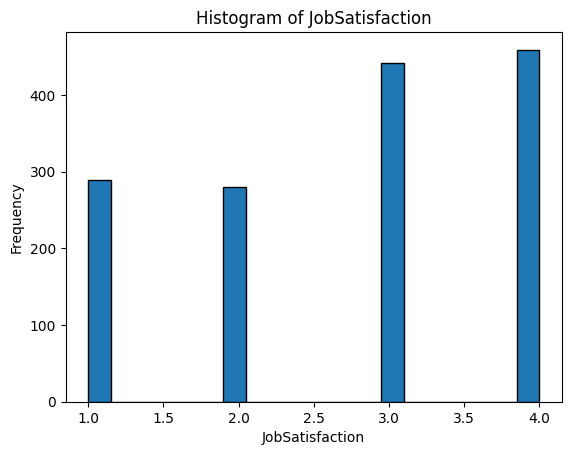

In [23]:
# 3. Plots of the data for a single column and plots that will analyze multiple columns
# 3.1 At least 3 plots (great if the type of plots will be different) for a single column;
# Histogram:
dataset['JobSatisfaction'].plot.hist(bins=20, edgecolor='black')
plt.title('Histogram of JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Frequency')
plt.show()

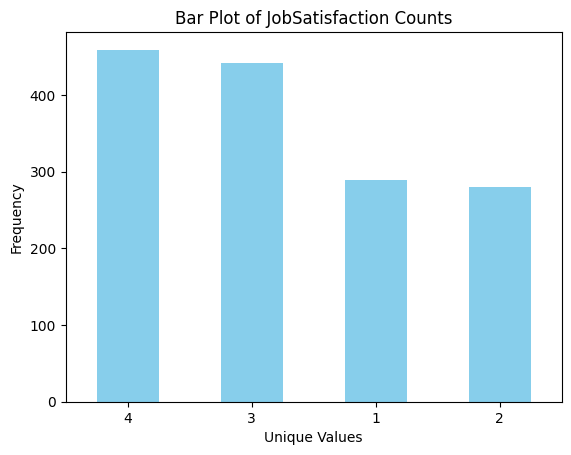

In [24]:
# Bar Plot (Value Counts):
value_counts = dataset['JobSatisfaction'].value_counts()

value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of JobSatisfaction Counts')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-labels for better readability
plt.show()

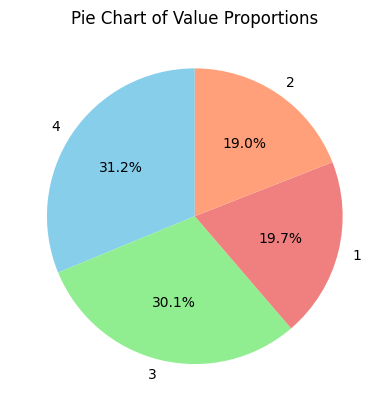

In [25]:
# Pie Chart:
value_counts = dataset['JobSatisfaction'].value_counts()
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Pie Chart of Value Proportions')
plt.ylabel('')
plt.show()

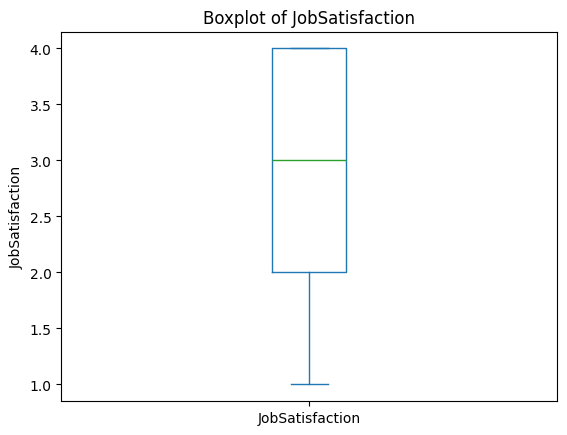

In [26]:
# Boxplot
dataset['JobSatisfaction'].plot.box()
plt.title('Boxplot of JobSatisfaction')
plt.ylabel('JobSatisfaction')
plt.show()

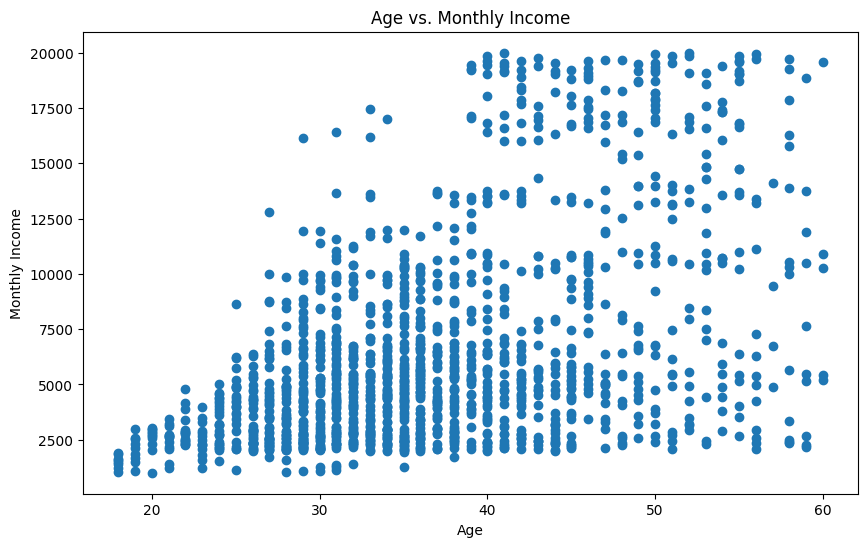

In [27]:
# 3.2 At least 3 plots involving multiple columns and showcasing the relationship between them
# 1. Age vs. Monthly Income Plot
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Age'], dataset['MonthlyIncome'])
plt.title('Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

<Figure size 1400x600 with 0 Axes>

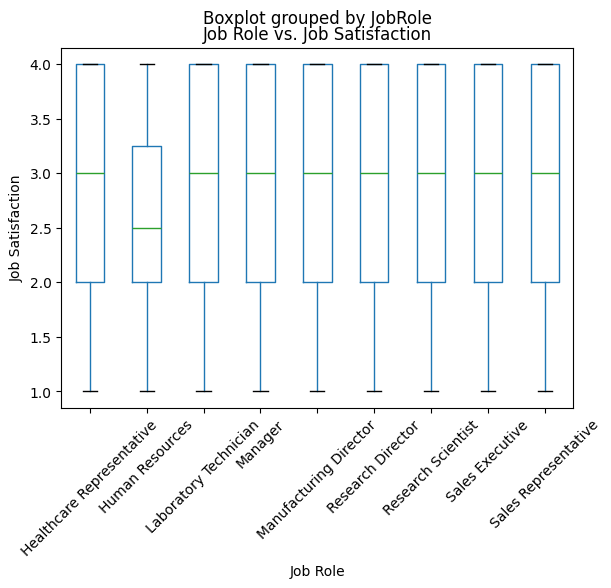

In [28]:
# 2. Job Role vs. Job Satisfaction Box Plot
plt.figure(figsize=(14, 6))
dataset.boxplot(column='JobSatisfaction', by='JobRole', grid=False)
plt.title('Job Role vs. Job Satisfaction')
plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

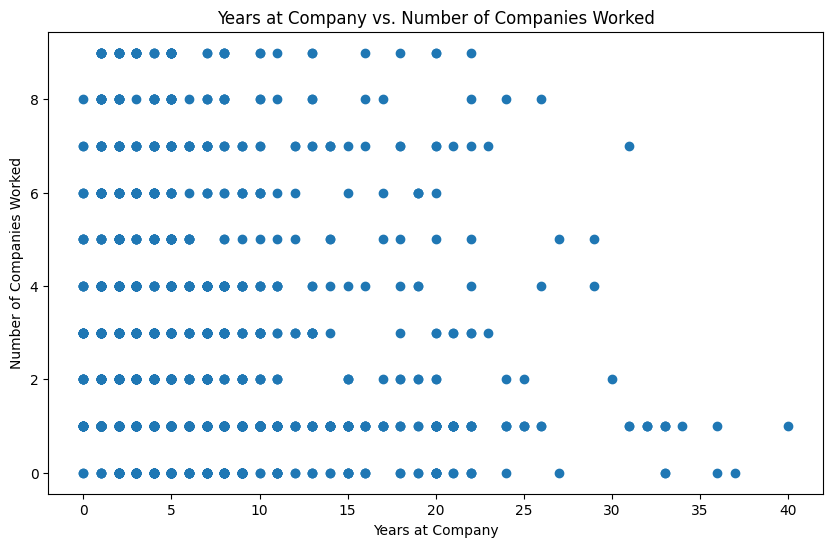

In [29]:
# 3. Years at Company vs. Number of Companies Worked Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(dataset['YearsAtCompany'], dataset['NumCompaniesWorked'])
plt.title('Years at Company vs. Number of Companies Worked')
plt.xlabel('Years at Company')
plt.ylabel('Number of Companies Worked')
plt.show()

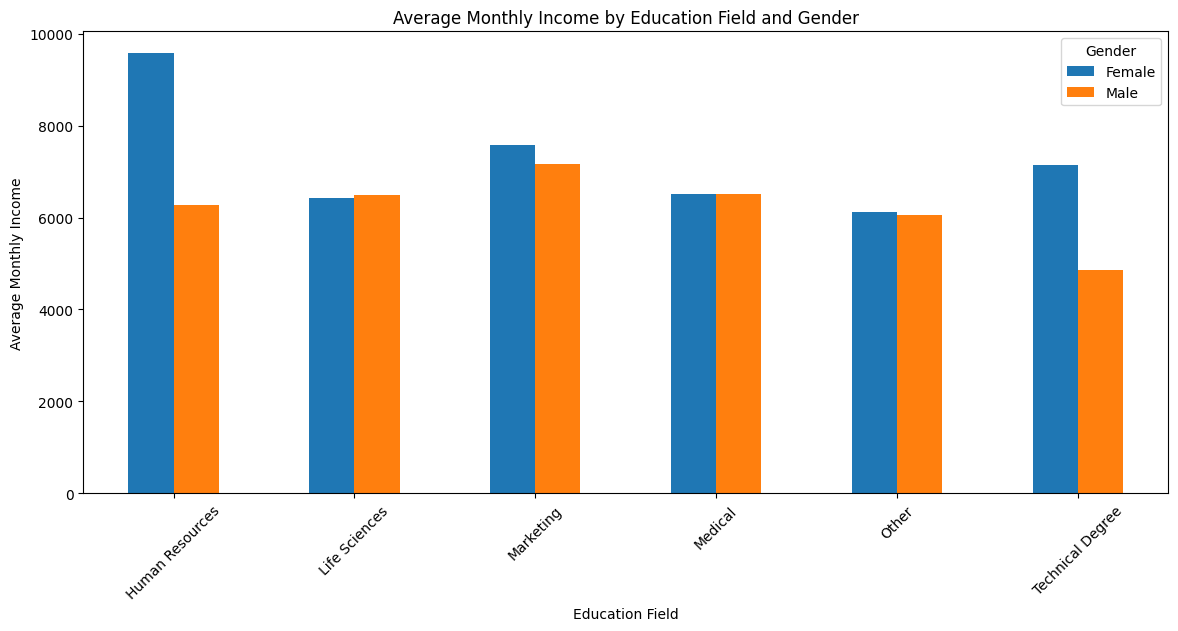

In [30]:
# 4. Average Monthly Income by Education Field and Gender 
grouped_data = dataset.groupby(['EducationField', 'Gender'])['MonthlyIncome'].mean().unstack()

# Creating the bar plot
grouped_data.plot(kind='bar', figsize=(14, 6))
plt.title('Average Monthly Income by Education Field and Gender')
plt.xlabel('Education Field')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [31]:
# 4. Modelling.
# - Apply Kfold or RepeatedKFold cross validation;

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = dataset[['YearsAtCompany', 'YearsInCurrentRole']].values.reshape(-1, 1)
y = dataset[['YearsSinceLastPromotion', 'TrainingTimesLastYear']].values.reshape(-1, 1)

# Number of folds
num_folds = 5

# Create KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Print the number of examples in the data
print("Number of examples in the data:", len(X))

# Initialize a model (Random Forest Classifier in this case)
model = RandomForestClassifier()

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate through each fold
for fold_num, (train_indices, test_indices) in enumerate(kf.split(X), 1):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    # Ensure y_train and y_test are 1-dimensional arrays
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Train your model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Fold {fold_num}: Accuracy = {accuracy}")

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"\nAverage Accuracy across all folds: {average_accuracy}")

Number of examples in the data: 2940
Fold 1: Accuracy = 0.33503401360544216
Fold 2: Accuracy = 0.358843537414966
Fold 3: Accuracy = 0.34523809523809523
Fold 4: Accuracy = 0.3299319727891156
Fold 5: Accuracy = 0.3010204081632653

Average Accuracy across all folds: 0.33401360544217684


In [33]:
# Apply Grid Search / Randomized Search pipelines
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encoding non-numeric categorical variables
labelencoder = LabelEncoder()
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for column in categorical_columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])
    
# Converting 'Attrition' to binary (Assuming 'Yes' = 1 and 'No' = 0)
dataset['Attrition'] = dataset['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature selection (excluding EmployeeCount, EmployeeNumber as they are likely identifiers)
features = [col for col in dataset.columns if col not in ['EmployeeCount', 'EmployeeNumber', 'Attrition']]
X = dataset[features]
y = dataset['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the RandomForestClassifier model
rf = RandomForestClassifier()

# Define hyperparameters for Randomized Search
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15, 20, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search setup
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

# Fitting the randomized search to the data
random_search.fit(X_train, y_train)

# Best parameters
best_parameters = random_search.best_params_
print("Best Parameters found by Randomized Search:", best_parameters)

# Evaluate the best model
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found by Randomized Search: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
Accuracy of the best model: 0.8662131519274376


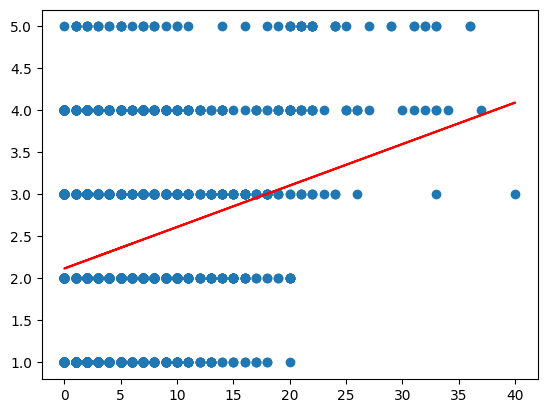

In [34]:
# - Create different type of models that are suited for your task (Linear Regression, Logistic
#   Regression, Lasso, Ridge, Elastic Net, Decision Tree, Random Forest, AdaBoost,
#   GradientBoost, SVM, KNN)

# Linear Regression
X = dataset[['YearsAtCompany', 'YearsInCurrentRole']].values.reshape(-1, 1) # transforms a matrix with one column into 2 column
Y = dataset[['JobLevel', 'JobSatisfaction']].values.reshape(-1, 1)
# X = dataset.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
# Y = dataset.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [35]:
# Logistic Regression

# Create labels and features

dummies = pd.get_dummies(dataset[['HourlyRate', 'DailyRate','MonthlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction', 'YearsAtCompany']])


In [36]:
dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   HourlyRate                1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   MonthlyRate               1470 non-null   int64
 3   JobInvolvement            1470 non-null   int64
 4   JobSatisfaction           1470 non-null   int64
 5   MonthlyIncome             1470 non-null   int64
 6   PerformanceRating         1470 non-null   int64
 7   RelationshipSatisfaction  1470 non-null   int64
 8   YearsAtCompany            1470 non-null   int64
dtypes: int64(9)
memory usage: 103.5 KB


In [37]:
print(dummies.head())

   HourlyRate  DailyRate  MonthlyRate  JobInvolvement  JobSatisfaction  \
0          94       1102        19479               3                4   
1          61        279        24907               2                2   
2          92       1373         2396               2                3   
3          56       1392        23159               3                3   
4          40        591        16632               3                2   

   MonthlyIncome  PerformanceRating  RelationshipSatisfaction  YearsAtCompany  
0           5993                  3                         1               6  
1           5130                  4                         4              10  
2           2090                  3                         2               0  
3           2909                  3                         3               8  
4           3468                  3                         4               2  


In [38]:
X_numerical = dataset.drop(['HourlyRate','Age', 'Attrition','BusinessTravel', 'DailyRate', 'Department','Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'DistanceFromHome','Gender', 'JobRole', 'MaritalStatus', 'MonthlyRate','NumCompaniesWorked', 'Over18', 'OverTime','PercentSalaryHike', 'StandardHours','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'YearsInCurrentRole' ], axis=1).astype('float64')
 # EnvironmentSatisfaction , JobSatisfaction

In [39]:
 # a list of all numerical features
list_numerical = X_numerical.columns
list_numerical

Index(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
       'RelationshipSatisfaction', 'YearsAtCompany'],
      dtype='object')

In [40]:
# Create all features
X = pd.concat([X_numerical, dummies[['HourlyRate', 'DailyRate','MonthlyRate','JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction', 'YearsAtCompany' ]]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EnvironmentSatisfaction   1470 non-null   float64
 1   JobInvolvement            1470 non-null   float64
 2   JobLevel                  1470 non-null   float64
 3   JobSatisfaction           1470 non-null   float64
 4   MonthlyIncome             1470 non-null   float64
 5   PerformanceRating         1470 non-null   float64
 6   RelationshipSatisfaction  1470 non-null   float64
 7   YearsAtCompany            1470 non-null   float64
 8   HourlyRate                1470 non-null   int64  
 9   DailyRate                 1470 non-null   int64  
 10  MonthlyRate               1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobSatisfaction           1470 non-null   int64  
 13  MonthlyIncome             1470 non-null   int64  
 14  Performa

In [41]:
# Split data
y = dataset['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.head()


,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,YearsAtCompany,HourlyRate,DailyRate,MonthlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,YearsAtCompany
682,3.0,2.0,1.0,2.0,2332.0,4.0,3.0,3.0,70,1184,3974,2,2,2332,4,3,3
1457,3.0,3.0,1.0,3.0,2001.0,3.0,2.0,5.0,98,1194,12549,3,3,2001,3,2,5
668,3.0,3.0,1.0,3.0,2377.0,3.0,2.0,2.0,77,995,9834,3,3,2377,3,2,2
411,1.0,3.0,5.0,1.0,19566.0,3.0,4.0,29.0,41,422,3854,3,1,19566,3,4,29
876,3.0,4.0,1.0,4.0,2678.0,3.0,4.0,2.0,43,654,5050,4,4,2678,3,4,2


In [42]:
# Standardization
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])

X_test[list_numerical] = scaler.transform(X_test[list_numerical])

X_train

,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,YearsAtCompany,HourlyRate,DailyRate,MonthlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,YearsAtCompany
682,0.245893,-1.023682,-0.971000,-0.652734,-0.889696,2.374597,0.251577,-0.663190,70,1184,3974,-1.023682,-0.652734,-0.889696,2.374597,0.251577,-0.663190
1457,0.245893,0.377074,-0.971000,0.259852,-0.958789,-0.421124,-0.672969,-0.342277,98,1194,12549,0.377074,0.259852,-0.958789,-0.421124,-0.672969,-0.342277
668,0.245893,0.377074,-0.971000,0.259852,-0.880303,-0.421124,-0.672969,-0.823647,77,995,9834,0.377074,0.259852,-0.880303,-0.421124,-0.672969,-0.823647
411,-1.594282,0.377074,2.597424,-1.565320,2.707728,-0.421124,1.176124,3.508687,41,422,3854,0.377074,-1.565320,2.707728,-0.421124,1.176124,3.508687
876,0.245893,1.777830,-0.971000,1.172438,-0.817472,-0.421124,1.176124,-0.823647,43,654,5050,1.777830,1.172438,-0.817472,-0.421124,1.176124,-0.823647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1.165981,0.377074,-0.078894,1.172438,-0.519600,-0.421124,-1.597516,-0.021363,44,954,5099,0.377074,1.172438,-0.519600,-0.421124,-1.597516,-0.021363
1344,1.165981,0.377074,-0.078894,-1.565320,-0.482236,2.374597,0.251577,-0.342277,78,783,13588,0.377074,-1.565320,-0.482236,2.374597,0.251577,-0.342277
527,1.165981,0.377074,-0.078894,1.172438,-0.250117,-0.421124,1.176124,0.460007,55,929,21703,0.377074,1.172438,-0.250117,-0.421124,1.176124,0.460007
1149,1.165981,-1.023682,-0.971000,-1.565320,-0.527741,-0.421124,-1.597516,-0.021363,67,1302,16290,-1.023682,-1.565320,-0.527741,-0.421124,-1.597516,-0.021363


In [43]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [44]:
# Model evaluation
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 26.86
R squared test set 21.17


In [45]:
# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 61.17
MSE test set 65.23


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

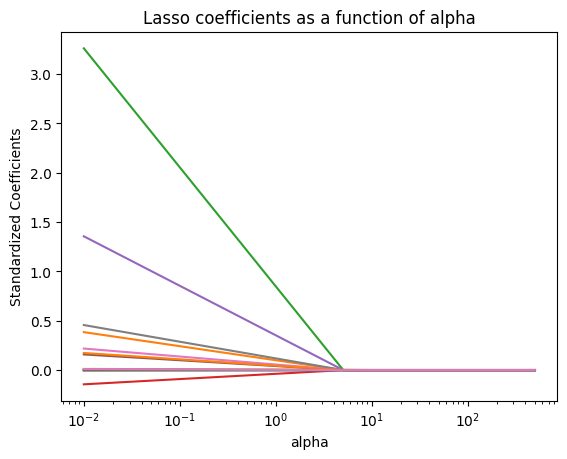

In [46]:
#Role of alpha -> we plot the lasso coefficients as a function of alpha (max_iter are the maximum number of iterations):
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

In [47]:
# Decision Tree
X = dataset[['JobSatisfaction', 'RelationshipSatisfaction']]
y = dataset['PerformanceRating']

In [48]:
print('Number of examples in the data:', X.shape[0])

Number of examples in the data: 1470


In [49]:
X

,JobSatisfaction,RelationshipSatisfaction
0,4,1
1,2,4
2,3,2
3,3,3
4,2,4
...,...,...
1465,4,3
1466,1,1
1467,2,2
1468,2,4


In [50]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [51]:
#Importing the Decision tree classifier from the sklearn library.

clf = DecisionTreeClassifier(criterion = 'entropy')

In [52]:
#Training the decision tree classifier. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [54]:
#Importing the accuracy metric from sklearn.metrics library

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.837568058076225
Accuracy Score on test data:  0.8722826086956522


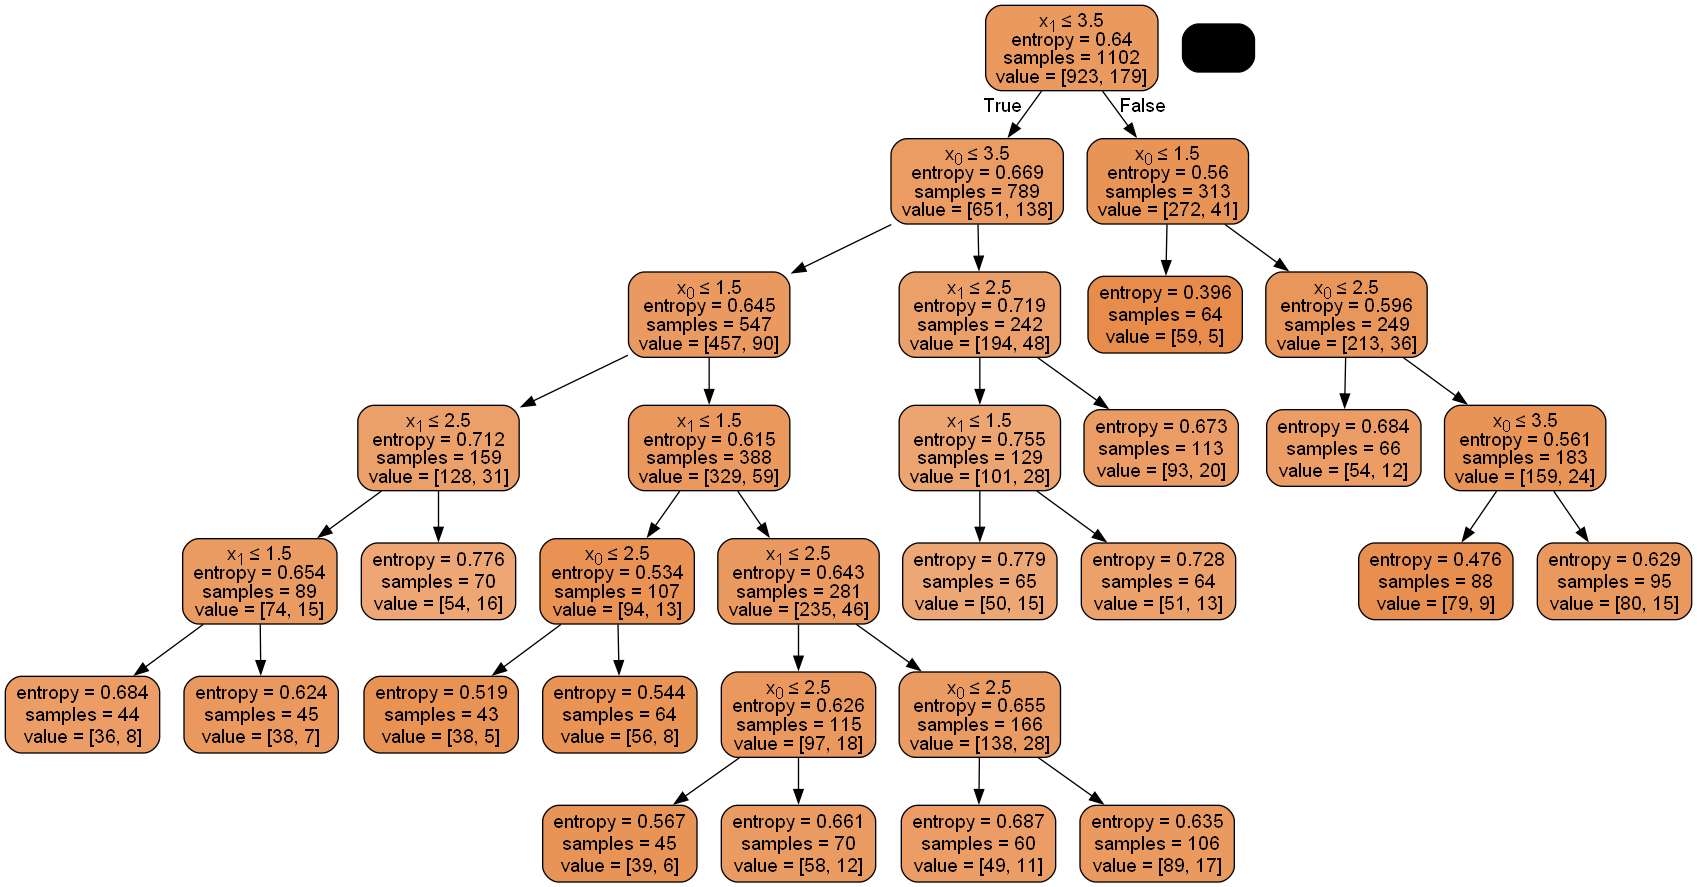

In [55]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [56]:
from sklearn.metrics import mean_absolute_error

# 5. Depending on your task, provide a list of metrics for the test set on your final (best) model resulted from hyperparameter tunning in step 4.
# Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: -0.010817224481086907
Mean Absolute Error (MAE): 0.24865856545411488
Mean Squared Error (MSE): 0.11261075928746866
Root Mean Squared Error (RMSE): 0.33557526620337896
